<a href="https://colab.research.google.com/github/SangeethaManammal/DeepLearningSamples/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos",origin=data_url,cache_dir=".",untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir  = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob("*/*.jpg")))

In [6]:
roses = list(data_dir.glob("roses/*.jpg"))
roses[:5]

[PosixPath('datasets/flower_photos/roses/269037241_07fceff56a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7345657862_689366e79a.jpg'),
 PosixPath('datasets/flower_photos/roses/20825078671_90b0389c70_m.jpg'),
 PosixPath('datasets/flower_photos/roses/921984328_a60076f070_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6655078437_759fd626fd_n.jpg')]

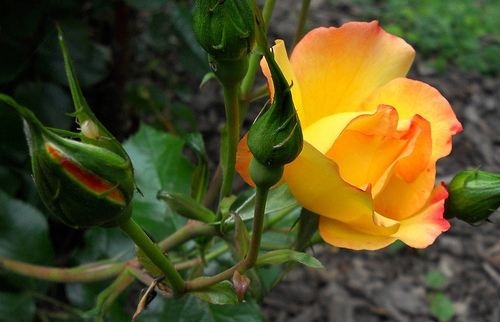

In [7]:
PIL.Image.open(str(roses[1]))

In [8]:
flower_dict = {
    "daisy": list(data_dir.glob("daisy/*")),
    "dandelion": list(data_dir.glob("dandelion/*")),
    "roses": list(data_dir.glob("roses/*")),
    "sunflowers": list(data_dir.glob("sunflowers/*")),
    "tulips": list(data_dir.glob("tulips/*"))    
}

In [9]:
len(flower_dict['roses'])

641

In [10]:
flower_dict_labels = {
    "daisy": 0,
    "dandelion": 1,
    "roses": 2,
    "sunflowers": 3,
    "tulips": 4    
}

In [11]:
img = cv2.imread(str(flower_dict['roses'][0]))
img

array([[[170, 146, 181],
        [170, 146, 181],
        [170, 146, 181],
        ...,
        [184, 158, 198],
        [185, 159, 199],
        [186, 160, 200]],

       [[170, 146, 181],
        [170, 146, 181],
        [170, 146, 181],
        ...,
        [184, 158, 198],
        [185, 159, 199],
        [184, 158, 198]],

       [[170, 146, 181],
        [170, 146, 181],
        [169, 145, 180],
        ...,
        [184, 158, 198],
        [185, 159, 199],
        [184, 159, 197]],

       ...,

       [[167, 149, 186],
        [166, 148, 185],
        [165, 147, 184],
        ...,
        [122, 104, 133],
        [123, 105, 134],
        [124, 106, 135]],

       [[167, 149, 186],
        [166, 148, 185],
        [165, 147, 184],
        ...,
        [122, 104, 133],
        [122, 104, 133],
        [123, 105, 134]],

       [[167, 149, 186],
        [166, 148, 185],
        [165, 147, 184],
        ...,
        [121, 103, 132],
        [122, 104, 133],
        [122, 104, 133]]

In [12]:
resized_img = cv2.resize(img,(180,180))
resized_img

array([[[170, 146, 181],
        [170, 146, 181],
        [170, 146, 181],
        ...,
        [184, 158, 197],
        [185, 159, 199],
        [185, 160, 199]],

       [[170, 146, 181],
        [170, 146, 181],
        [169, 145, 180],
        ...,
        [184, 158, 197],
        [185, 159, 199],
        [184, 159, 198]],

       [[170, 146, 181],
        [170, 146, 181],
        [169, 145, 180],
        ...,
        [183, 158, 196],
        [184, 159, 197],
        [184, 159, 197]],

       ...,

       [[168, 150, 187],
        [167, 149, 186],
        [165, 148, 184],
        ...,
        [122, 104, 133],
        [123, 105, 134],
        [124, 106, 135]],

       [[167, 149, 186],
        [166, 148, 185],
        [165, 147, 183],
        ...,
        [122, 104, 133],
        [122, 104, 133],
        [123, 105, 134]],

       [[167, 149, 186],
        [166, 148, 185],
        [165, 147, 183],
        ...,
        [121, 103, 132],
        [122, 104, 133],
        [122, 104, 133]]

In [13]:
x,y = [],[]

for flower_name,images in flower_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flower_dict_labels[flower_name])

In [14]:
x = np.array(x)
y = np.array(y)

In [15]:
x.shape

(3670, 180, 180, 3)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [17]:
x_train.shape

(2752, 180, 180, 3)

In [18]:
y_train.shape

(2752,)

In [19]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [20]:
y_train[0]

2

In [21]:
x_train_scaled[0]

array([[[0.06666667, 0.47843137, 0.81176471],
        [0.09019608, 0.48235294, 0.82352941],
        [0.07843137, 0.45882353, 0.81960784],
        ...,
        [0.08627451, 0.15686275, 0.59215686],
        [0.08627451, 0.16470588, 0.59607843],
        [0.09411765, 0.17254902, 0.6       ]],

       [[0.0745098 , 0.48235294, 0.82352941],
        [0.09803922, 0.48627451, 0.83137255],
        [0.09019608, 0.4745098 , 0.82352941],
        ...,
        [0.05882353, 0.12941176, 0.56078431],
        [0.0627451 , 0.14117647, 0.56862745],
        [0.07843137, 0.15686275, 0.58431373]],

       [[0.09019608, 0.48627451, 0.83529412],
        [0.10980392, 0.49411765, 0.83921569],
        [0.10196078, 0.48627451, 0.82745098],
        ...,
        [0.06666667, 0.12941176, 0.55294118],
        [0.0627451 , 0.13333333, 0.56078431],
        [0.0745098 , 0.14901961, 0.58039216]],

       ...,

       [[0.65882353, 0.75294118, 0.84705882],
        [0.6745098 , 0.76862745, 0.85490196],
        [0.67058824, 0

In [22]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16,3,padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [23]:
model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 15s 46ms/step - loss: 1.4428 - accuracy: 0.4055
Epoch 2/30
86/86 [==============================] - 4s 45ms/step - loss: 1.0683 - accuracy: 0.5730
Epoch 3/30
86/86 [==============================] - 4s 45ms/step - loss: 0.8843 - accuracy: 0.6635
Epoch 4/30
86/86 [==============================] - 4s 45ms/step - loss: 0.7035 - accuracy: 0.7358
Epoch 5/30
86/86 [==============================] - 4s 45ms/step - loss: 0.5047 - accuracy: 0.8129
Epoch 6/30
86/86 [==============================] - 4s 45ms/step - loss: 0.3477 - accuracy: 0.8805
Epoch 7/30
86/86 [==============================] - 4s 45ms/step - loss: 0.2096 - accuracy: 0.9313
Epoch 8/30
86/86 [==============================] - 4s 45ms/step - loss: 0.1451 - accuracy: 0.9575
Epoch 9/30
86/86 [==============================] - 4s 44ms/step - loss: 0.0985 - accuracy: 0.9735
Epoch 10/30
86/86 [==============================] - 4s 45ms/step - loss: 0.0554 - accuracy: 0.9884
Epoch 11

In [24]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 29ms/step - loss: 3.7490 - accuracy: 0.5904


[3.74904727935791, 0.5904139280319214]

In [25]:
predictions = model.predict(x_test_scaled)

In [27]:
score = tf.nn.softmax(predictions[0])
np.argmax(score)

1

In [28]:
y_test[0]

1

In [42]:
data_augmentation = keras.Sequential([
      layers.experimental.preprocessing.RandomFlip('horizontal'),                              
      layers.experimental.preprocessing.RandomZoom(0.1),
      layers.experimental.preprocessing.RandomRotation(0.1),
])

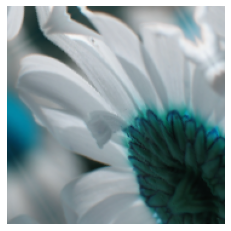

In [43]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))

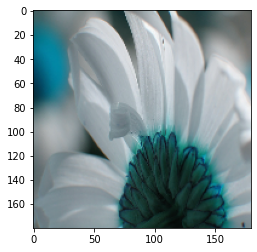

In [37]:
plt.imshow(x[0])

In [45]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [46]:
model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 7s 53ms/step - loss: 1.3620 - accuracy: 0.4262
Epoch 2/30
86/86 [==============================] - 4s 51ms/step - loss: 1.0473 - accuracy: 0.5883
Epoch 3/30
86/86 [==============================] - 4s 51ms/step - loss: 0.9256 - accuracy: 0.6323
Epoch 4/30
86/86 [==============================] - 4s 51ms/step - loss: 0.8846 - accuracy: 0.6512
Epoch 5/30
86/86 [==============================] - 4s 51ms/step - loss: 0.8071 - accuracy: 0.6791
Epoch 6/30
86/86 [==============================] - 4s 51ms/step - loss: 0.7618 - accuracy: 0.7053
Epoch 7/30
86/86 [==============================] - 4s 51ms/step - loss: 0.7237 - accuracy: 0.7257
Epoch 8/30
86/86 [==============================] - 4s 51ms/step - loss: 0.6669 - accuracy: 0.7467
Epoch 9/30
86/86 [==============================] - 4s 51ms/step - loss: 0.6757 - accuracy: 0.7369
Epoch 10/30
86/86 [==============================] - 4s 51ms/step - loss: 0.6296 - accuracy: 0.7558
Epoch 11/

In [47]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 23ms/step - loss: 1.0577 - accuracy: 0.7059


[1.0576508045196533, 0.7058823704719543]